# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('data_clustering.csv')

In [3]:
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,DayOfWeek,IsWeekend,TransactionToBalanceRatio,AgeGroup,Target
0,-1.080281,1,36,0,0,-0.552784,-0.204672,-0.000326,-0.848404,-0.297763,0.0,-0.383288,1,1
1,0.371339,1,15,0,0,0.309031,-0.204672,2.230061,-0.848404,-0.297763,0.0,-0.332897,1,0
2,-0.630545,1,23,2,3,-0.911874,-0.204672,-1.029497,1.888910,-0.962247,0.0,-0.158338,2,1
3,-0.397220,1,33,2,3,-1.357146,-0.204672,0.891357,-0.848404,1.695690,0.0,-0.344812,2,1
4,-1.082846,0,1,2,3,1.127756,-0.204672,0.597386,0.520253,-0.962247,0.0,-0.385226,0,0


Distribusi Kelas pada Kolom Target:
Target
0    1298
1    1217
Name: count, dtype: int64


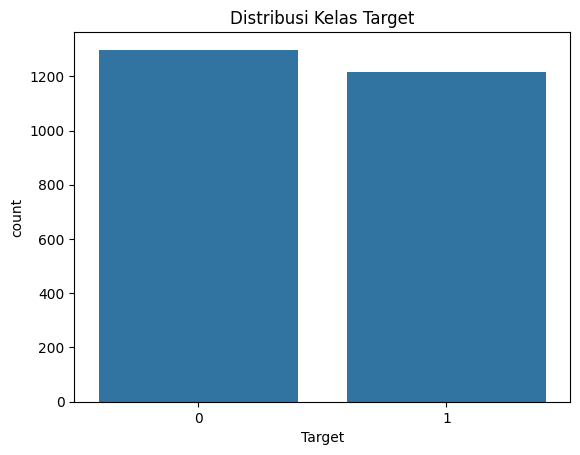

In [4]:
# Pengecekan distribusi kelas pada Target untuk melihat keseimbangan data
print("Distribusi Kelas pada Kolom Target:")
print(df['Target'].value_counts())

# Visualisasi distribusi kelas
sns.countplot(x='Target', data=df)
plt.title('Distribusi Kelas Target')
plt.show()

# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.

X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Ukuran data latih (X_train): {X_train.shape}")
print(f"Ukuran data uji (X_test): {X_test.shape}")

Ukuran data latih (X_train): (2012, 13)
Ukuran data uji (X_test): (503, 13)


# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

In [6]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

print("Model Decision Tree berhasil dilatih.")

Model Decision Tree berhasil dilatih.


In [7]:
# Menyimpan Model
joblib.dump(model_dt, 'decision_tree_model.h5')
print("Model Decision Tree telah disimpan sebagai 'decision_tree_model.h5'")

Model Decision Tree telah disimpan sebagai 'decision_tree_model.h5'


# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [8]:
# Model RandomForest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
print("Model Random Forest berhasil dilatih.")

# Model GradientBoosting
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)
print("Model Gradient Boosting berhasil dilatih.")

Model Random Forest berhasil dilatih.
Model Gradient Boosting berhasil dilatih.


--- Laporan Evaluasi untuk: Decision Tree ---
Akurasi: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       1.00      1.00      1.00       243

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503



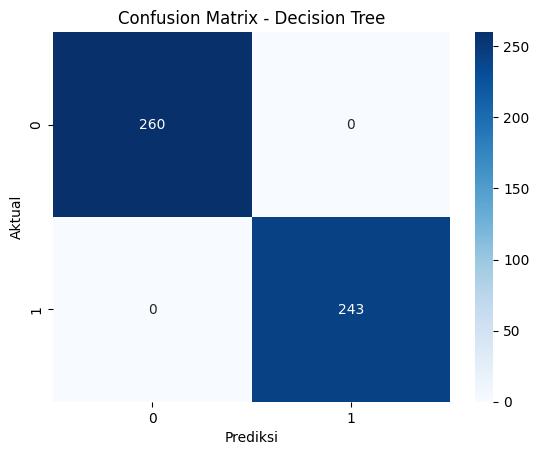

--------------------------------------------------

--- Laporan Evaluasi untuk: Random Forest ---
Akurasi: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       1.00      1.00      1.00       243

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503



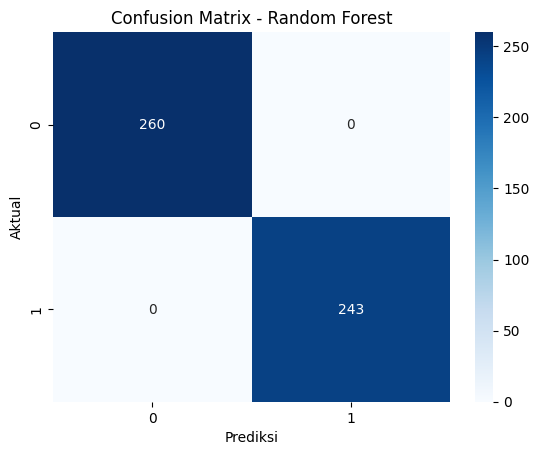

--------------------------------------------------

--- Laporan Evaluasi untuk: Gradient Boosting ---
Akurasi: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       1.00      1.00      1.00       243

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503



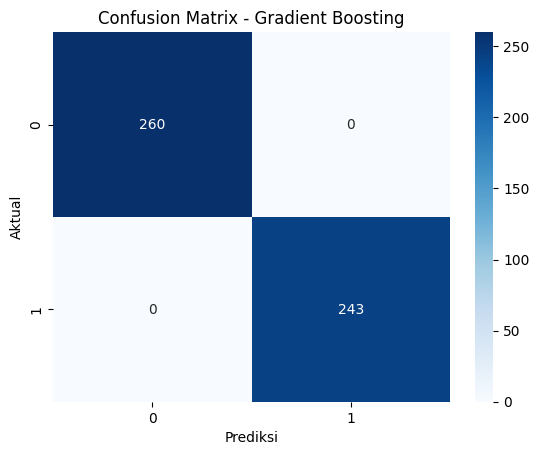

--------------------------------------------------



In [9]:
# Membuat fungsi untuk evaluasi
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"--- Laporan Evaluasi untuk: {model_name} ---")
    print(f"Akurasi: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    
    # Visualisasi Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()
    print("-" * 50 + "\n")

# Evaluasi setiap model
evaluate_model(model_dt, X_test, y_test, "Decision Tree")
evaluate_model(model_rf, X_test, y_test, "Random Forest")
evaluate_model(model_gb, X_test, y_test, "Gradient Boosting")

In [10]:
# Menyimpan Model Selain Decision Tree
joblib.dump(model_rf, 'explore_RandomForest_classification.h5')
joblib.dump(model_gb, 'explore_GradientBoosting_classification.h5')
print("Model RandomForest dan GradientBoosting telah disimpan.")

Model RandomForest dan GradientBoosting telah disimpan.


Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [11]:
# Lakukan Hyperparameter Tuning dan Latih ulang.
# Asumsikan RandomForest adalah yang terbaik.

# Mendefinisikan parameter grid untuk dicari
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5, # 5-fold cross-validation
    n_jobs=-1, # Menggunakan semua core CPU
    scoring='f1_weighted', # Metrik evaluasi yang difokuskan
    verbose=1
)

# Melatih GridSearchCV
print("Memulai Hyperparameter Tuning untuk Random Forest...")
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("\nParameter terbaik yang ditemukan:")
print(grid_search.best_params_)

# Model terbaik setelah tuning
best_rf_model = grid_search.best_estimator_


Memulai Hyperparameter Tuning untuk Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Parameter terbaik yang ditemukan:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


--- Laporan Evaluasi untuk: Tuned Random Forest ---
Akurasi: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       1.00      1.00      1.00       243

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503



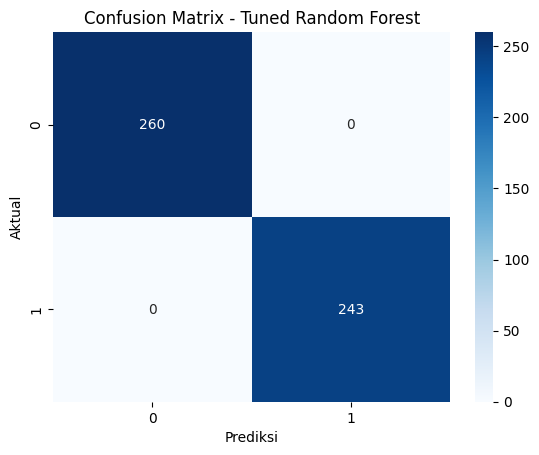

--------------------------------------------------



In [12]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.
evaluate_model(best_rf_model, X_test, y_test, "Tuned Random Forest")

In [13]:
# Menyimpan Model hasil tuning
joblib.dump(best_rf_model, 'tuning_classification.h5')
print("Model hasil tuning telah disimpan sebagai 'tuning_classification.h5'")

Model hasil tuning telah disimpan sebagai 'tuning_classification.h5'
